## EV Market segmentation

Following on from the McD market segmentation this notebook seeks to apply those same principles to analyse the EV market in India


### Step 3: Data Collection

The real-world data was collected through researching and carefully selecting open-source datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data_smev = pd.read_excel("./smev_data.xlsx", sheet_name=None)

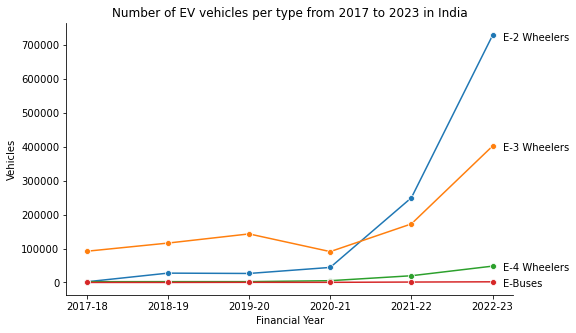

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(data=data_smev['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

for col in data_smev['EV Industries']['category'].unique():
    last_point = data_smev['EV Industries'][data_smev['EV Industries']['category'] == col].iloc[-1]
    plt.annotate(f"{last_point['category']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().set_visible(False)
plt.title('Number of EV vehicles per type from 2017 to 2023 in India')

plt.show()

In [2]:
data = pd.read_csv("./ev2_bikewale.csv")

In [3]:
print(f" Size = {data.size}")
print(f" Shape = {data.shape}")

 Size = 11816
 Shape = (844, 14)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [5]:
print(pd.isnull(data).sum())

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64


In [6]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [7]:
for i in range(1, len(data.columns)):
    unique_values = data.iloc[:, i].unique()
    print(f"Unique values in column {i+1} - {data.columns[i]}: \n {unique_values}")

Unique values in column 2 - Used it for: 
 ['Daily Commute' 'Everything' 'Occasional Commute' 'Leisure Rides' 'Tours']
Unique values in column 3 - Owned for: 
 ['Never owned' '> 1 yr' '< 3 months' '6 months-1 yr' '3-6 months'
 'Occasional Commute']
Unique values in column 4 - Ridden for: 
 [nan '< 5000 kms' '5000-10000 kms' '> 15000 kms' '10000-15000 kms'
 'Never owned']
Unique values in column 5 - rating: 
 [1 3 2 5 4]
Unique values in column 6 - Visual Appeal: 
 [ 3.  4.  1.  5.  2. nan]
Unique values in column 7 - Reliability: 
 [ 4.  1.  2.  3.  5. nan]
Unique values in column 8 - Performance: 
 [nan  3.  5.  1.  4.  2.]
Unique values in column 9 - Service Experience: 
 [nan  1.  2.  3.  5.  4.]
Unique values in column 10 - Extra Features: 
 [nan  4.  5.  1.  3.  2.]
Unique values in column 11 - Comfort: 
 [ 4.  3.  5.  1.  2. nan]
Unique values in column 12 - Maintenance cost: 
 [nan  5.  4.  1.  3.  2.]
Unique values in column 13 - Value for Money: 
 [ 1.  3.  2.  5.  4. nan]
Uni

In [8]:
EV_bin = data.iloc[:, 4:13].copy()
EV_bin.shape

(844, 9)

In [9]:
EV_bin.head()

,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0
1,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0
2,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0
3,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0


### EDA

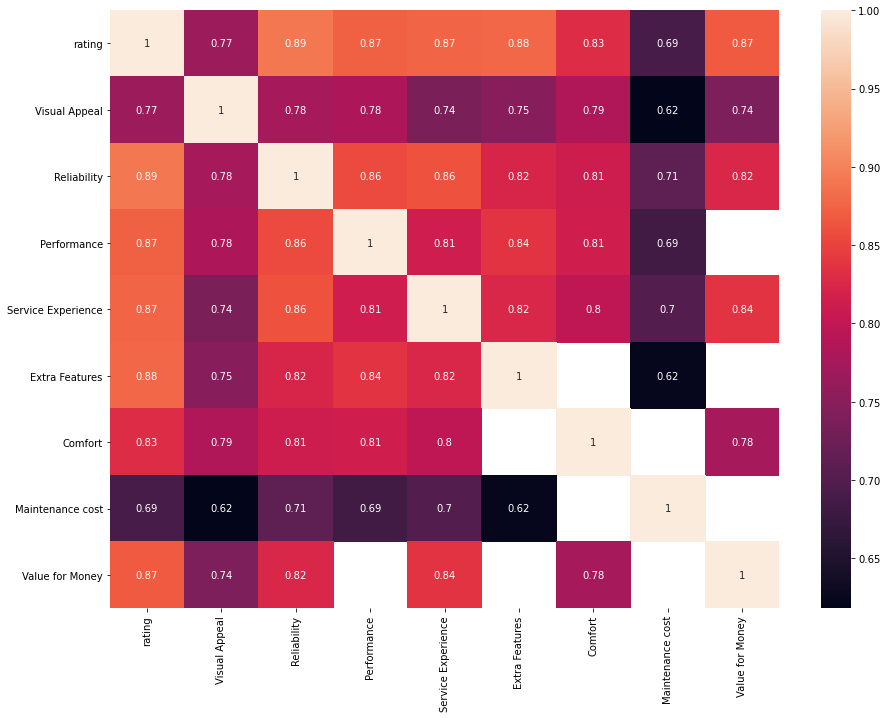

In [10]:
correlation_matrix = EV_bin.corr()
plt.figure(figsize=(15,11))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Missing Data Handling

In [11]:
print(pd.isnull(EV_bin).sum())

rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
dtype: int64


In [12]:
# missing value percentage per column

miss_per = ((EV_bin.isnull().sum() * 100/EV_bin.shape[0])).sort_values(ascending = False)

miss_per

Maintenance cost      78.672986
Extra Features        78.080569
Performance           59.123223
Value for Money       53.791469
Comfort               37.203791
Service Experience    16.706161
Reliability           15.165877
Visual Appeal         12.440758
rating                 0.000000
dtype: float64

In [13]:
miss_per.loc[miss_per<50]

Comfort               37.203791
Service Experience    16.706161
Reliability           15.165877
Visual Appeal         12.440758
rating                 0.000000
dtype: float64

Several columns report a significant amount of missing data, with 4 columns missing over half of the data. 

In cases where the amount of missing data is small relative to the size of your dataset and does not bias the analysis, one might choose to remove rows or columns with missing values altogether.

However, that does not seem to be the case here with  high degree of missing data for several variables. To ensure there is no bias in missing data we check the mean as per different groups.


In [33]:
updated_df = EV_bin.drop(['Maintenance cost', 'Extra Features', 'rating'], axis=1)

In [34]:
#splitting the data into x and y
y = EV_bin['rating']

In [ ]:
'Comfort' 'Service Experience' 'Reliability' 'Visual Appeal'
 

In [138]:
mean_by_group1 = EV_bin.groupby('rating')['Reliability'].mean()
mean_by_group = EV_bin.groupby('rating')['Reliability'].transform('mean')

print(mean_by_group1)
print(mean_by_group.unique())

rating
1    1.320388
2    2.358974
3    2.982143
4    3.907563
5    4.652027
Name: Reliability, dtype: float64
[1.32038835 2.98214286 2.35897436 4.65202703 3.90756303]


In [134]:
mean_by_group[1]

1.2537313432835822

In [78]:
mean_by_group = data.groupby('Owned for')['Value for Money'].mean()

print(mean_by_group)

Owned for
3-6 months            3.517857
6 months-1 yr         3.246575
< 3 months            3.684211
> 1 yr                2.756757
Never owned           4.163636
Occasional Commute         NaN
Name: Value for Money, dtype: float64


In [75]:
missing_values_by_group = data.groupby('Owned for')['Value for Money'].apply(lambda x: x.isnull().sum())

print(missing_values_by_group)

Owned for
3-6 months             55
6 months-1 yr          61
< 3 months            125
> 1 yr                 92
Never owned           120
Occasional Commute      1
Name: Value for Money, dtype: int64


In [79]:
missing_values_by_group = data.groupby('Owned for')['Maintenance cost'].apply(lambda x: x.isnull().sum())

print(100*missing_values_by_group/data['Owned for'].value_counts())

3-6 months             80.180180
6 months-1 yr          80.597015
< 3 months             73.636364
> 1 yr                 75.369458
Never owned            86.285714
Occasional Commute    100.000000
dtype: float64


In [82]:
missing_values_by_group = data.groupby('Owned for')['Extra Features'].apply(lambda x: x.isnull().sum())

print(100*missing_values_by_group/data['Owned for'].value_counts())

3-6 months             78.378378
6 months-1 yr          81.343284
< 3 months             72.272727
> 1 yr                 74.876847
Never owned            86.285714
Occasional Commute    100.000000
dtype: float64


In [85]:
missing_values_by_group = data.groupby('Owned for')['Performance'].apply(lambda x: x.isnull().sum())

print(100*missing_values_by_group/data['Owned for'].value_counts())

3-6 months             58.558559
6 months-1 yr          67.164179
< 3 months             52.727273
> 1 yr                 67.487685
Never owned            51.428571
Occasional Commute    100.000000
dtype: float64


In [86]:
missing_values_by_group = data.groupby('Owned for')['Value for Money'].apply(lambda x: x.isnull().sum())

print(100*missing_values_by_group/data['Owned for'].value_counts())

3-6 months             49.549550
6 months-1 yr          45.522388
< 3 months             56.818182
> 1 yr                 45.320197
Never owned            68.571429
Occasional Commute    100.000000
dtype: float64


So we notice Occasional commute has one value that holds several of missing values in other columns, hence we shall remove that row altogether.

In [43]:
filtered_data = data[data['Owned for'] != 'Occasional Commute']

In [117]:
missing_values_by_group = filtered_data.groupby('Owned for')['Value for Money'].apply(lambda x: x.isnull().sum())

print(100*missing_values_by_group/filtered_data['Owned for'].value_counts())

3-6 months       49.549550
6 months-1 yr    45.522388
< 3 months       56.818182
> 1 yr           45.320197
Never owned      68.571429
dtype: float64


In [119]:
filtered_data.shape

(843, 14)

Now we drop the 2 columns that show close to 80% missing data

In [15]:
EV_fil = filtered_data.iloc[:, 4:13].copy()

columns_to_drop = ['Maintenance cost', 'Extra Features']

EV_fil = EV_fil.drop(columns=columns_to_drop)

In [28]:
for i in range(1, len(EV_fil.columns)):
    highest_correlation_column = correlation_matrix[EV_fil.columns[i]].sort_values(ascending=False).index[1]
    mean_values = EV_fil.groupby(highest_correlation_column)[EV_fil.columns[i]].transform('mean')
    EV_fil[EV_fil.columns[i]].fillna(mean_values, inplace=True)


In [30]:
print(pd.isnull(EV_fil).sum())

rating                0
Visual Appeal         0
Reliability           0
Performance           0
Service Experience    0
Comfort               0
Value for Money       0
dtype: int64


In [32]:
# File path where you want to save the CSV file
file_path = 'EV_fil.csv'

# Save the DataFrame as a CSV file
EV_fil.to_csv(file_path, index=False)  # Set index=False if you don't want to write row names

print(f"Data saved successfully to {file_path}")

Data saved successfully to EV_fil.csv


In [34]:
# Threshold for conversion
threshold = 3

# Initialize a new DataFrame to store the binary data
binary_data = pd.DataFrame()

# Iterate over numeric columns in the original DataFrame
for column in EV_fil.select_dtypes(include='number'):
    # Apply condition and create corresponding binary column
    binary_column = EV_fil[column].apply(lambda x: 1 if x >= threshold else 0)
    # Assign the binary column to the new DataFrame
    binary_data[column + '_binary'] = binary_column

binary_data.head()

,rating_binary,Visual Appeal_binary,Reliability_binary,Performance_binary,Service Experience_binary,Comfort_binary,Value for Money_binary
0,0,1,1,0,0,1,0
1,0,1,0,0,0,1,1
2,1,1,1,1,0,1,0
3,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0


In [35]:
# File path where you want to save the CSV file
file_path = 'binary_data.csv'

# Save the DataFrame as a CSV file
binary_data.to_csv(file_path, index=False)  # Set index=False if you don't want to write row names

print(f"Data saved successfully to {file_path}")

Data saved successfully to binary_data.csv


In [36]:
EV_fil.head()

,rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money
0,1,3.0,4.0,1.728155,1.205742,4.0,1.0
1,1,3.0,1.0,1.728155,1.000000,3.0,3.0
2,3,4.0,4.0,3.409091,2.000000,5.0,2.0
3,1,1.0,1.0,1.728155,1.000000,1.0,1.0
4,1,3.0,4.0,1.728155,1.000000,3.0,2.0


### Exploring the 2-Wheeler Models

In [44]:
# File path where you want to save the CSV file
file_path = 'filtered_data.csv'

# Save the DataFrame as a CSV file
filtered_data.to_csv(file_path, index=False)  # Set index=False if you don't want to write row names

print(f"Data saved successfully to {file_path}")

Data saved successfully to filtered_data.csv


In [47]:
mean_by_Model = filtered_data.groupby('Model Name')['rating'].mean()
print(mean_by_Model)

Model Name
Ampere Magnus EX           3.964286
Ampere Magnus Pro          3.090909
Ampere REO                 2.583333
Ampere Zeal                2.846154
Ather 450X                 3.666667
BGauss B8                  3.000000
Bajaj Chetak               4.133333
Benling Aura               2.863636
Bounce Infinity E1         2.916667
Evolet Polo                5.000000
Gemopai Astrid Lite        5.000000
Gemopai Ryder              3.600000
Hero Electric Atria        4.333333
Hero Electric Flash        3.862745
Hero Electric NYX          2.333333
Hero Electric NYX HX       5.000000
Hero Electric Optima       3.109756
Hero Electric Optima CX    3.555556
Hero Electric Photon       3.540541
Joy e-bike Monster         3.000000
Joy e-bike Wolf            1.800000
OLA S1                     3.206897
OLA S1 Pro                 3.642857
Odysse Evoqis              5.000000
Okinawa Lite               3.750000
Okinawa Praise             2.663158
Okinawa R30                3.250000
Okinawa Ridge Plu

In [50]:
means = filtered_data.iloc[:, 4:14].groupby('Model Name').mean().reset_index()
means

,Model Name,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Ampere Magnus EX,3.964286,4.153846,3.760000,3.720000,3.619048,3.619048,5.000000,4.052632,5.000000
1,Ampere Magnus Pro,3.090909,3.312500,3.437500,3.000000,2.812500,2.933333,4.000000,3.571429,4.000000
2,Ampere REO,2.583333,3.181818,2.761905,1.000000,2.142857,1.000000,3.047619,1.000000,2.952381
3,Ampere Zeal,2.846154,3.777778,2.888889,3.000000,2.600000,2.833333,2.500000,3.333333,2.750000
4,Ather 450X,3.666667,4.034483,3.923077,4.111111,3.576923,3.000000,3.851852,3.500000,4.000000
5,BGauss B8,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,2.000000,NaN
6,Bajaj Chetak,4.133333,4.500000,4.307692,3.875000,4.230769,4.500000,4.181818,4.500000,4.800000
7,Benling Aura,2.863636,3.631579,2.947368,3.529412,2.444444,2.687500,2.000000,3.125000,1.500000
8,Bounce Infinity E1,2.916667,3.200000,2.600000,NaN,2.900000,NaN,3.100000,NaN,2.900000
9,Evolet Polo,5.000000,5.000000,4.500000,NaN,4.500000,NaN,4.500000,NaN,4.000000
